<a href="https://colab.research.google.com/github/Khizarabbas2323/Task-2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('Data1.csv')  # replace with actual filename if different
print(df.head())

Saving Data1.csv to Data1.csv
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                2.0       Graduate             No      9600000.0   
1        2                0.0   Not Graduate            Yes      4100000.0   
2        3                3.0       Graduate             No      9100000.0   
3        4                3.0       Graduate             No      8200000.0   
4        5                5.0   Not Graduate            Yes      9800000.0   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                  2400000.0   
1      12200000           8           417                  2700000.0   
2      29700000          20           506                  7100000.0   
3      30700000           8           467                 18200000.0   
4      24200000          20           382                 12400000.0   

    commercial_assets_value   luxury_assets_value   bank_asset_value

In [ ]:
print(df.shape)

(4269, 13)


In [ ]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4269 non-null   int64  
 1    no_of_dependents          4268 non-null   float64
 2    education                 4269 non-null   object 
 3    self_employed             4269 non-null   object 
 4    income_annum              4268 non-null   float64
 5    loan_amount               4269 non-null   int64  
 6    loan_term                 4269 non-null   int64  
 7    cibil_score               4269 non-null   int64  
 8    residential_assets_value  4267 non-null   float64
 9    commercial_assets_value   4268 non-null   float64
 10   luxury_assets_value       4266 non-null   float64
 11   bank_asset_value          4268 non-null   float64
 12   loan_status               4269 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage:

In [ ]:
#Handle Missing Values

print(df.isnull().sum())

loan_id                      0
 no_of_dependents            1
 education                   0
 self_employed               0
 income_annum                1
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    2
 commercial_assets_value     1
 luxury_assets_value         3
 bank_asset_value            1
 loan_status                 0
dtype: int64


In [ ]:
# Clean column names by removing extra spaces
df.columns = df.columns.str.strip()

# Fill missing numeric values with the median
df['no_of_dependents'] = df['no_of_dependents'].fillna(df['no_of_dependents'].median())
df['income_annum'] = df['income_annum'].fillna(df['income_annum'].median())
df['residential_assets_value'] = df['residential_assets_value'].fillna(df['residential_assets_value'].median())
df['commercial_assets_value'] = df['commercial_assets_value'].fillna(df['commercial_assets_value'].median())
df['luxury_assets_value'] = df['luxury_assets_value'].fillna(df['luxury_assets_value'].median())
df['bank_asset_value'] = df['bank_asset_value'].fillna(df['bank_asset_value'].median())


In [ ]:
print(df.isnull().sum())

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


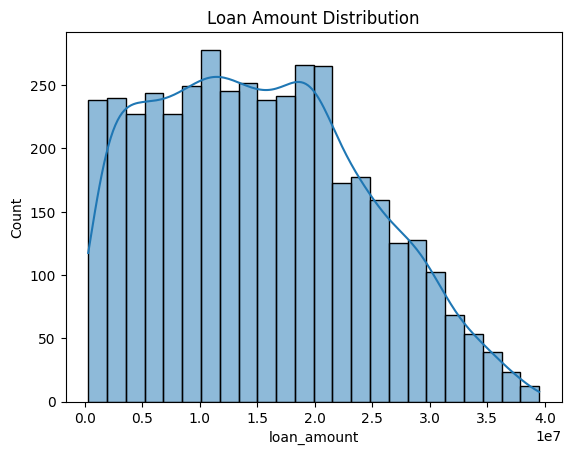

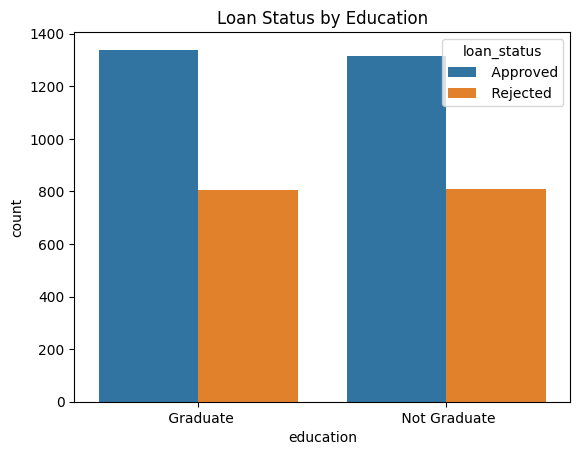

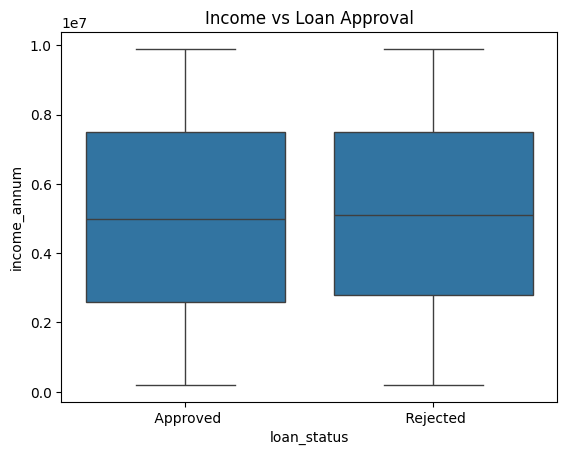

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE for loan amount
sns.histplot(df['loan_amount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Countplot for Education vs Loan_Status
sns.countplot(x='education', hue='loan_status', data=df)
plt.title("Loan Status by Education")
plt.show()

# Boxplot for Income vs Loan Approval
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title("Income vs Loan Approval")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode binary categorical columns
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])  # This is the target

# Features (drop loan_id and loan_status)
X = df.drop(['loan_id', 'loan_status'], axis=1)

# Target
y = df['loan_status']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression Evaluation
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

# Decision Tree Evaluation
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))


Logistic Regression Accuracy: 0.7985948477751756
Confusion Matrix:
 [[488  48]
 [124 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       536
           1       0.80      0.61      0.69       318

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854

Decision Tree Accuracy: 0.9648711943793911
Confusion Matrix:
 [[509  27]
 [  3 315]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       536
           1       0.92      0.99      0.95       318

    accuracy                           0.96       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.96      0.97       854



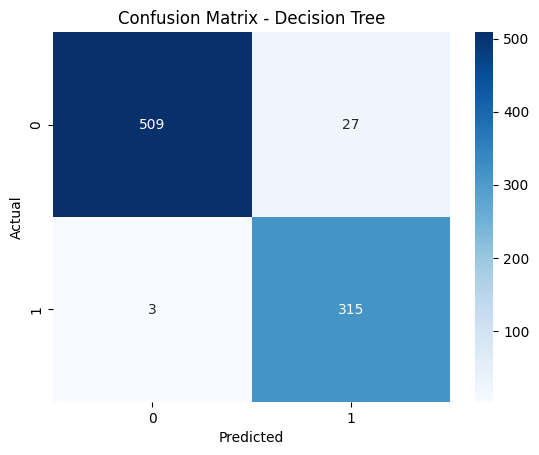

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, dt_preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
